###  **Importing the pandas and read csv file**

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#path of the csv file
path="datasets/Bengaluru_House_Data.csv"
#reading the data using pandas
data=pd.read_csv(path)
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


<hr style="border: 1px solid black;">


### Data Exploration

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [3]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [4]:
data.shape

(13320, 9)

**1.checking the null values**

In [5]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

**It shows that the dataframe contains the multiple null values**

 - The **Location** contains only one missing value
 - The **Size** ,**Society** ,**Bath**& **Balcony** contains the respective missing values

**2.Dropping the unnecessary columns:**

In [6]:
df=data.drop(['availability','society'],axis=1)

In [7]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [8]:
df.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

**3.Filling the missing values with '0':**

In [9]:
#filling the null valuess of  to 0
df.fillna(0, inplace=True)

### Feature Enginnering:

<hr style="border: 1px solid black;">


**1.Counting the 'Location' columns there are some rows whose occurence is less,so we assign a string'other' to those
values**

In [10]:
#counting the rows
value_count=df['location'].value_counts()
len(value_count[value_count<20])

1158

In [11]:
#it shows that the  1158 rows values are less than 20,so we assign 'other ' to those values
df['location']=df['location'].apply(lambda x:x if value_count[x]>20 else 'Other')

**2.The 'BHK' columns contains BHK values & Bedroom values so we extract those values in new columns 'bhk' & 'Bedroom**

In [12]:
# Split the values by 'BHK' and 'Bedroom'
df['BHK'] = df['size'].str.extract(r'(\d+) BHK', expand=False)
df['Bedroom'] = df['size'].str.extract(r'(\d+) Bedroom', expand=False)

In [13]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,BHK,Bedroom
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2,NaN
1,Plot Area,Other,4 Bedroom,2600,5.0,3.0,120.00,NaN,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3,NaN
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3,NaN
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2,NaN


In [14]:
df2=df.copy()

In [15]:
# now we can drop the column 'size'
df2.drop('size',axis=1, inplace=True)

In [16]:
df2['Bedroom'].value_counts()

4     826
3     547
2     329
5     297
6     191
1     105
8      84
7      83
9      46
10     12
11      2
43      1
12      1
18      1
Name: Bedroom, dtype: int64

In [17]:
#there are so rows whose occurence is less so we drop those columns
mask=df2['Bedroom'].value_counts()<12
to_drop = mask[mask].index.tolist()
df3 = df2[~df2['Bedroom'].isin(to_drop)]

In [18]:
df3['Bedroom'].value_counts()

4     826
3     547
2     329
5     297
6     191
1     105
8      84
7      83
9      46
10     12
Name: Bedroom, dtype: int64

In [19]:
df3.isna().sum()

area_type         0
location          0
total_sqft        0
bath              0
balcony           0
price             0
BHK            2549
Bedroom       10795
dtype: int64

In [20]:
df3=df3.fillna(0)

In [21]:
df3['total_sqft'].value_counts()

1200           840
1100           221
1500           205
2400           195
600            180
              ... 
2466 - 2856      1
3580             1
2461             1
1437             1
4689             1
Name: total_sqft, Length: 2116, dtype: int64

In [22]:
# its clear that the columns contains range like values 
len(df3[df3['total_sqft'].str.contains("-")])

201

In [23]:
#there are 201 range rows so we drop them all
df4 = df3[~df3['total_sqft'].str.contains('-')]

In [24]:
df4['total_sqft'].value_counts()

1200       840
1100       221
1500       205
2400       195
600        180
          ... 
1113.12      1
1544         1
621          1
981          1
4689         1
Name: total_sqft, Length: 1939, dtype: int64

In [25]:
#in also 'total_sqft 'columns there are values whose occurence is less 
value_counts = df['total_sqft'].value_counts()
to_drop = value_counts[value_counts <2].index
df5 = df4[~df4['total_sqft'].isin(to_drop)]

In [26]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12360 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   12360 non-null  object 
 1   location    12360 non-null  object 
 2   total_sqft  12360 non-null  object 
 3   bath        12360 non-null  float64
 4   balcony     12360 non-null  float64
 5   price       12360 non-null  float64
 6   BHK         12360 non-null  object 
 7   Bedroom     12360 non-null  object 
dtypes: float64(3), object(5)
memory usage: 869.1+ KB


In [27]:
df_copy=df5.copy()

In [28]:
# changinng the dtype of BHK and  Bedroom to int64
df_copy['BHK'] =df_copy['BHK'].astype('int64')
df_copy['Bedroom'] =df_copy['Bedroom'].astype('int64')

In [29]:
df_copy.isna().sum()

area_type     0
location      0
total_sqft    0
bath          0
balcony       0
price         0
BHK           0
Bedroom       0
dtype: int64

In [30]:
# the data type of 'total_sqft ' need to be in integer or float but it is in the form of object 
df_copy['total_sqft'] = pd.to_numeric(df_copy['total_sqft'], errors='coerce')
#here error='coerce' returns the nan for those abnormal form of data / other than numeric

In [31]:
#it contains null values
df_copy.isna().any()

area_type     False
location      False
total_sqft     True
bath          False
balcony       False
price         False
BHK           False
Bedroom       False
dtype: bool

In [32]:
df_copy.fillna(0, inplace=True)

In [33]:
df_copy.head()

,area_type,location,total_sqft,bath,balcony,price,BHK,Bedroom
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,0
1,Plot Area,Other,2600.0,5.0,3.0,120.00,0,4
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3,0
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,0
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2,0


#### I am not setisfied with the data , that's why it contains too many outliers, to remove such kind of noise in data i have done a little bit research in India real state website

**--------------------------------------------------------------------------------------------------------------**

**According to the indian real state**
- 1BHK ---->450-600(sqft)
- 2BHK ---->650-800
- 3BHK ---->900-1100
- 4BHK ---->1300-1700

**I need to check weather the total_sqft values are valid for the given number of 'bhk','bedroom','balcony' etc**

In [34]:
def get_area_bhk(bhk):
    if bhk == 1:
        return 450
    elif bhk == 2:
        return 650
    elif bhk == 3:
        return 900
    elif bhk == 4:
        return 1300
    elif bhk >= 5:
        return 1300 + (bhk-4)*500

df_copy['area_bhk'] = df_copy['BHK'].apply(get_area_bhk)

In [35]:
df_copy.head()

,area_type,location,total_sqft,bath,balcony,price,BHK,Bedroom,area_bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,0,650.0
1,Plot Area,Other,2600.0,5.0,3.0,120.00,0,4,NaN
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3,0,900.0
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,0,900.0
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2,0,650.0


In [36]:
df_copy.fillna(0, inplace=True)

In [37]:
mask = df_copy['total_sqft'] < df_copy['bath']*48 + df_copy['Bedroom']*120 + df_copy['balcony']*15+ df_copy['area_bhk']
df_copy[mask]['total_sqft']

26        660.0
35        700.0
45        600.0
70        500.0
78        460.0
          ...  
13198    1200.0
13211     745.0
13221    1178.0
13273     510.0
13305     500.0
Name: total_sqft, Length: 548, dtype: float64

In [38]:
# there are 548 rows that contains the false values
df_copy = df_copy[~mask]
df_copy.shape

(11812, 9)

In [39]:
df_final=df_copy.drop('area_bhk',axis=1)

In [40]:
df_final.head()

,area_type,location,total_sqft,bath,balcony,price,BHK,Bedroom
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,0
1,Plot Area,Other,2600.0,5.0,3.0,120.00,0,4
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3,0
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,0
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2,0


In [41]:
#adding new columns contains the values oer squre feet
df_final['price_per_sqft']=df_final['price']*100000 /df_final['total_sqft']

In [42]:
loc_counts=df_final['location'].value_counts()
less=loc_counts[loc_counts<50].index.to_list()
df_final.loc[df_final['location'].isin(less), 'location'] = 'other'


In [43]:
df_final.head()

,area_type,location,total_sqft,bath,balcony,price,BHK,Bedroom,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,0,3699.810606
1,Plot Area,Other,2600.0,5.0,3.0,120.00,0,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3,0,4305.555556
3,Super built-up Area,other,1521.0,3.0,1.0,95.00,3,0,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2,0,4250.000000


In [44]:
df_final.drop(['area_type'],axis=1,inplace=True)

---

### Data Visualization :


<hr style="border: 1px solid black;">


In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



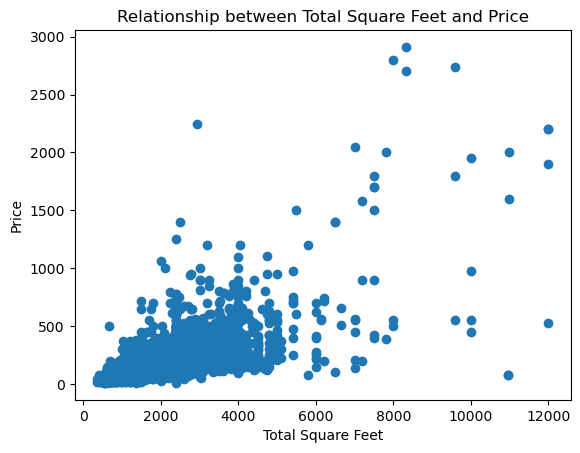

In [46]:
plt.scatter(df_final['total_sqft'], df_final['price'])
plt.xlabel('Total Square Feet')
plt.ylabel('Price')
plt.title('Relationship between Total Square Feet and Price')
plt.show()

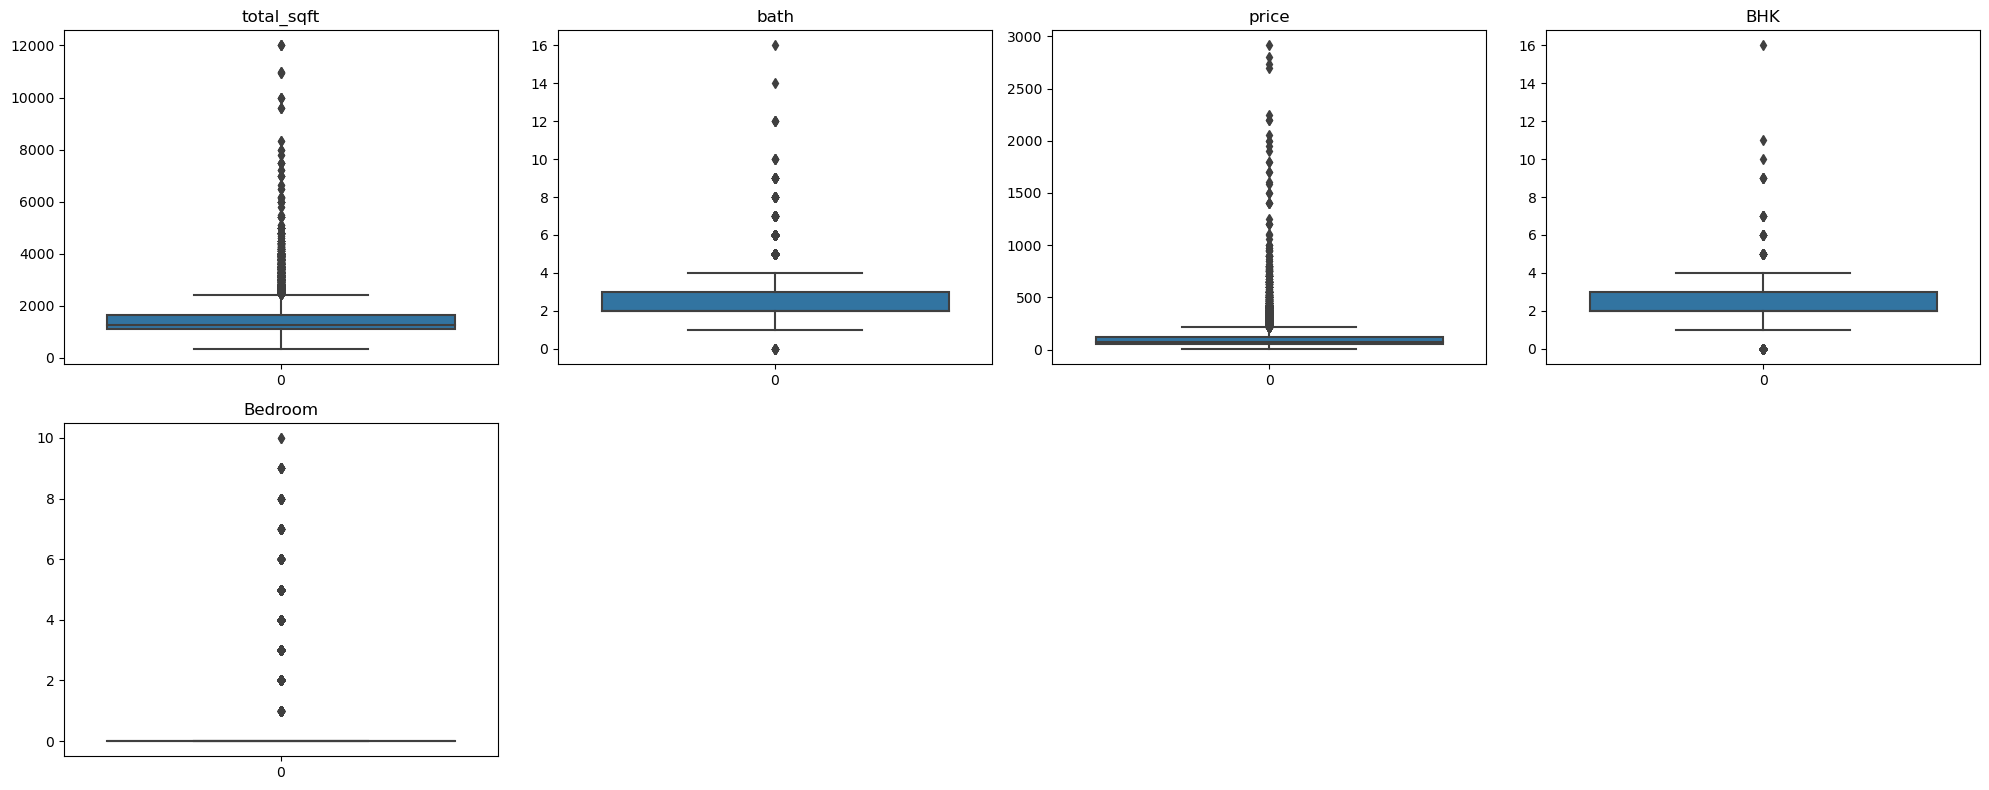

In [47]:
columns=[ 'total_sqft', 'bath', 'price', 'BHK', 'Bedroom']
plt.figure(figsize=(20, 8))
for i, col in enumerate(columns):
    plt.subplot(2, 4, i+1)
    sns.boxplot(df_final[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [48]:
#datasets contains outliers
df_final.shape

(11812, 8)

### outlier detection and remove:

<hr style="border: 1px solid black;">


In [49]:
import numpy as np
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.total_sqft)
        st=np.std(subdf.total_sqft)   
        reduced_df=subdf[(subdf.total_sqft>(m-st)) & (subdf.total_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [50]:
remove_pps_outliers(df_final)

,location,total_sqft,bath,balcony,price,BHK,Bedroom,price_per_sqft
0,7th Phase JP Nagar,1000.0,2.0,1.0,38.0,2,0,3800.000000
1,7th Phase JP Nagar,1080.0,2.0,2.0,72.0,2,0,6666.666667
2,7th Phase JP Nagar,1270.0,2.0,2.0,93.0,2,0,7322.834646
3,7th Phase JP Nagar,1420.0,2.0,1.0,100.0,3,0,7042.253521
4,7th Phase JP Nagar,1850.0,3.0,1.0,150.0,3,0,8108.108108
...,...,...,...,...,...,...,...,...
10202,other,1405.0,2.0,1.0,85.0,3,0,6049.822064
10203,other,1285.0,2.0,2.0,90.0,2,0,7003.891051
10204,other,1050.0,2.0,1.0,42.0,2,0,4000.000000
10205,other,1500.0,6.0,2.0,145.0,0,5,9666.666667


In [51]:
# List of columns to check for outliers
cols = [ 'bath', 'price', 'BHK', 'total_sqft','Bedroom']

# Remove outliers using IQR method
for col in cols:
    Q1 = df_final[col].quantile(0.25)
    Q3 = df_final[col].quantile(0.75)
    IQR = Q3 - Q1
    df_copy = df_final[(df_final[col] >= Q1 - 1.5*IQR) & (df_final[col] <= Q3 + 1.5*IQR)]

# Check the result
print(df_copy.shape) 

(9722, 8)


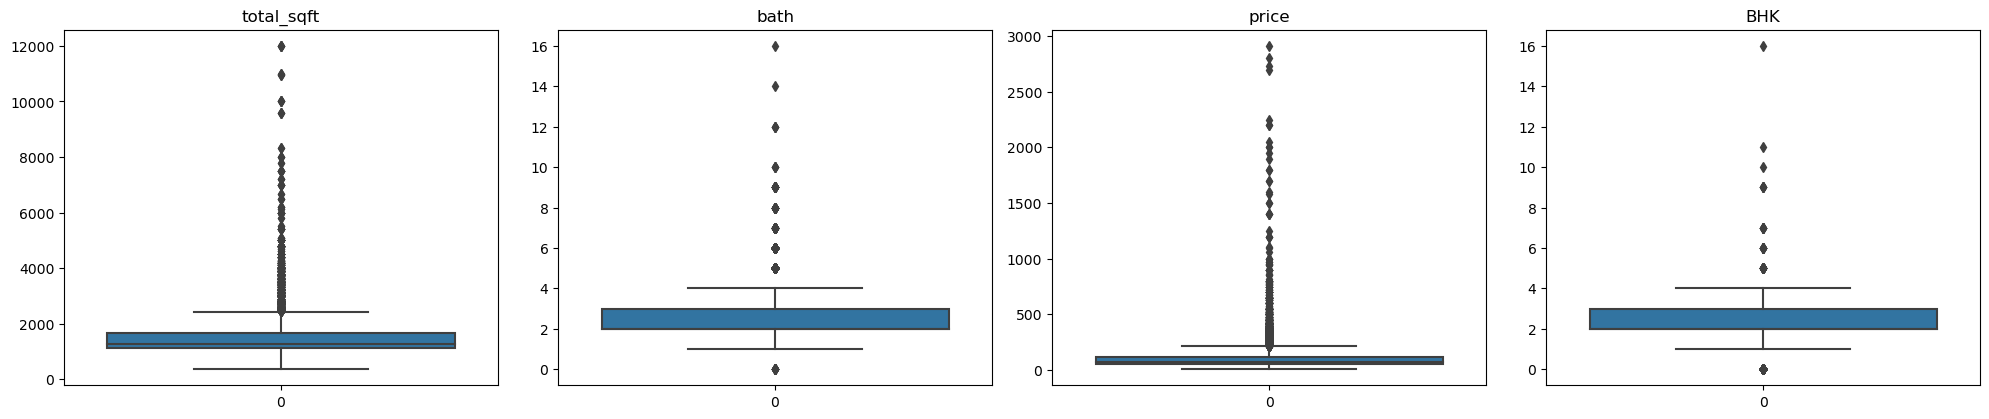

In [52]:
columns=['total_sqft', 'bath', 'price', 'BHK']
plt.figure(figsize=(20, 8))
for i, col in enumerate(columns):
    plt.subplot(2, 4, i+1)
    sns.boxplot(df_final[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [53]:
import numpy as np

# Define a function to calculate the z-score for a given column
def zscore(col):
    mean = col.mean()
    std = col.std()
    return (col - mean) / std

# Calculate the z-score for each column
z_scores = df_final[['total_sqft', 'bath', 'price', 'BHK', 'Bedroom', 'price_per_sqft']].apply(zscore)

# Define a threshold for outliers (e.g. 3 standard deviations from the mean)
threshold = 3

# Identify the rows that contain outliers in any column
mask = (np.abs(z_scores) > threshold).any(axis=1)

# Remove the rows that contain outliers
final_df = df_final[~mask].reset_index(drop=True)


In [54]:
final_df.shape

(11066, 8)

In [55]:
import numpy as np

Q1 = final_df['price_per_sqft'].quantile(0.25)
Q3 = final_df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the rows that contain outliers in the 'price_per_sqft' column
mask = (final_df['price_per_sqft'] < lower_bound) | (final_df['price_per_sqft'] > upper_bound)

# Remove the rows that contain outliers
final_df = final_df[~mask].reset_index(drop=True)



In [56]:
Q1 = final_df['total_sqft'].quantile(0.25)
Q3 = final_df['total_sqft'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the rows that contain outliers in the 'price_per_sqft' column
mask = (final_df['total_sqft'] < lower_bound) | (final_df['total_sqft'] > upper_bound)

# Remove the rows that contain outliers
final_df = final_df[~mask].reset_index(drop=True)

In [57]:
Q1 = final_df['price'].quantile(0.25)
Q3 = final_df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the rows that contain outliers in the 'price_per_sqft' column
mask = (final_df['price'] < lower_bound) | (final_df['price'] > upper_bound)

# Remove the rows that contain outliers
final_df = final_df[~mask].reset_index(drop=True)

In [58]:
final_df.shape

(9315, 8)

#### Encoding:

<hr style="border: 1px solid black;">


In [59]:
dummies=pd.get_dummies(final_df['location'])

In [60]:
df2 = pd.concat([final_df, dummies], axis=1)

In [61]:
df2.shape

(9315, 54)

In [62]:
df2.drop(['location'],axis=1,inplace=True)

### Modeling:

<hr style="border: 1px solid black;">


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

y=df2.price
X=df2.drop(['price'],axis=1)

x_train,x_valid,y_train,y_valid=train_test_split(X,y,train_size=0.8, random_state=0)


LR=LinearRegression(fit_intercept=True, copy_X=True)
DTR=DecisionTreeRegressor()
RF=RandomForestRegressor(random_state=0)

def m_fit(model):
    features_names=X.columns
    model.fit(x_train,y_train)
    print(model.score(x_valid,y_valid))
    y_train_pred = model.predict(x_train)
    y_val_pred = model.predict(x_valid)
    train_error = mean_squared_error(y_train, y_train_pred)
    val_error = mean_squared_error(y_valid, y_val_pred)
    print("train error is:",train_error)
    print("validation error is:",val_error)
    

In [64]:
m_fit(RF)

0.9993810040041005
train error is: 0.06409863436929684
validation error is: 0.421675119602791


In [65]:
m_fit(LR)

0.97823549612192
train error is: 17.90798309192691
validation error is: 14.826509115860368


In [66]:
m_fit(DTR)

0.9977028847069058
train error is: 2.032491865303734e-31
validation error is: 1.5648507783145464


### Prediction:

<hr style="border: 1px solid black;">


In [67]:
def predict_price(location,sqft):
    loc_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    if loc_index >=0:
        x[loc_index] = 1
    return RF.predict([x])[0]

In [68]:
predict_price('Uttarahalli',900)

17.933000000000003

In [69]:
predict_price('Begur Road',1000)

18.246800000000004

#### Extracting to pickle: 

<hr style="border: 1px solid black;">

In [70]:
import pickle
with open('Bengaluru_House_Price_Datasets_Model.pickle','wb') as f:
    pickle.dump(RF,f)

In [71]:
import json
columns={
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json",'w') as f:
    f.write(json.dumps(columns))